# Titanic EDA + Simple Model [0.80622]

## Introduction

https://www.kaggle.com/mviola/titanic-eda-simple-model-0-80622  
이 노트북은 Titanic : Machine Learning from Disaster 대회에 대한 저의 첫 번째 접근 방식을 다룹니다 ( 자세한 내용은 [여기](https://www.kaggle.com/c/titanic) 에서 확인 ).  
초심자로서 제 목표는 기본 기능 엔지니어링과 간단한 모델로 80 % 이상의 점수를 얻는 것이었고 결국 큰 만족과 노력으로 그것을 만들었습니다.  
지나치게 복잡하지 않고 똑같이하고 싶은 분들을 위해이 과정을 안내하고 어떤 식 으로든 도움을 드리고자합니다.  
시작하자!  

## Importing packages and data

표준 모듈을로드하고 데이터를 살펴 보는 것으로 시작합니다.

In [1]:
import pandas as pd 
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
print('Setup complete')

Setup complete


In [2]:
!pip install kaggle

In [3]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# kaggle.json을 아래 폴더로 옮긴 뒤, file을 사용할 수 있도록 권한을 부여한다. 
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
uploaded file "kaggle.json" with length 63 bytes


In [4]:
ls -1ha ~/.kaggle/kaggle.json

/root/.kaggle/kaggle.json


In [5]:
from google.colab import drive # 패키지 불러오기 
from os.path import join  

# 구글 드라이브 마운트
ROOT = "/content/drive"     # 드라이브 기본 경로
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # 드라이브 기본 경로 

# 프로젝트 파일 생성 및 다운받을 경로 이동
MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/python_basic/kaggle_titanic-eda-simple-model-0-80622_mviola/data'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/python_basic/kaggle_titanic-eda-simple-model-0-80622_mviola/data


In [6]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/Colab Notebooks/python_basic/kaggle_titanic-eda-simple-model-0-80622_mviola/data


In [7]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         82           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        177           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        269           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2401           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      18309            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4648            True  
connectx

In [8]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 7.92MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 3.90MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 451kB/s]


In [9]:
!ls

gender_submission.csv  test.csv  train.csv


In [10]:
# Load and display train data
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


그런 다음 훈련 및 테스트 데이터 모두에서 결 측값을 확인합니다.

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
# Load and display test data
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Age, Cabin및의 값 Embarked은 기차 데이터에서 누락되고 Age, Fare및의 값 Cabin은 테스트 데이터에서 누락되었습니다.  
필요한 경우 나중에 처리합니다.  
마지막으로, 우리가 무엇을 예측할 것인지에 대한 아이디어를 얻기 위해 목표에 집중합니다. 얼마나 많은 승객이 살아남 았는지 봅시다.  

In [16]:
train_data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

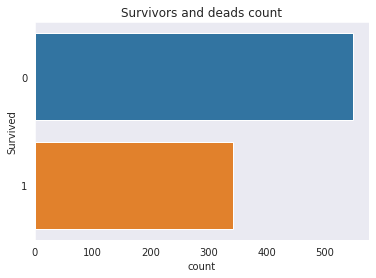

In [17]:
g = sns.countplot(y=train_data['Survived']).set_title('Survivors and deads count')

훈련 데이터에서 승객의 약 38.4 %만이 재난에서 살아 남았습니다. 이것은 우리가 염두에 두어야 할 중요한 가치입니다.

## Feature analysis and creation

이 섹션의 목표는 모델링 부분에서보다 정확한 기능 선택을 수행하기 위해 데이터에 대한 일반적인 이해를 얻는 것입니다.  
따라서 승객의 생존 여부를 예측하는 데있어 그 중요성을 결정하기 위해 한 번에 하나의 기능을 탐색 할 것입니다.

### Sex

승객의 약 65 %는 남성이고 나머지 35 %는 여성이었습니다.  
여기서 주목해야 할 중요한 점은 여성의 생존율이 남성의 생존율의 4 배라는 점이며 이것이 Sex가장 유익한 특징 중 하나입니다.  
성별 제출 자체 점수가 0.76555 인 것은 아닙니다!  

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


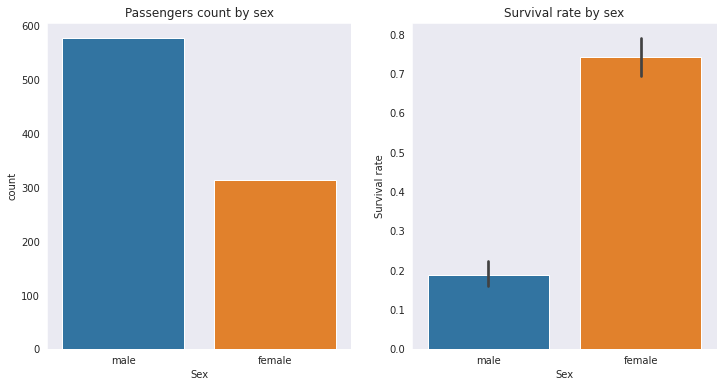

In [18]:
fig, axarr = plt.subplots(1, 2, figsize=(12,6))
a = sns.countplot(train_data['Sex'], ax=axarr[0]).set_title('Passengers count by sex')
axarr[1].set_title('Survival rate by sex')
b = sns.barplot(x='Sex', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

### Pclass

배에는 세 개의 클래스가 있었고 플롯에서 우리는 세 번째 클래스의 승객 수가 1 등석과 2 등석의 승객 수를 합친 것보다 더 많음을 알 수 있습니다.  
그러나 등급별 생존율은 동일하지 않습니다. 1 등석 승객의 60 % 이상과 2 등석 승객의 약 절반이 구조 된 반면 3 등석 승객의 75 %는 재난에서 살아남지 못했습니다.  
이러한 이유로 이것은 확실히 고려해야 할 중요한 측면입니다.

In [19]:
train_data.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

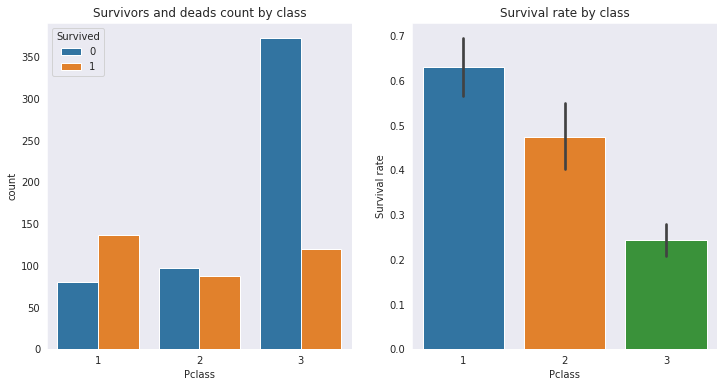

In [20]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(x='Pclass', hue='Survived', data=train_data, ax=axarr[0]).set_title('Survivors and deads count by class')
axarr[1].set_title('Survival rate by class')
b = sns.barplot(x='Pclass', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

우리는 또한 생존에 의해 속도를 볼 수 Sex와 Pclass매우 인상적이다 : 비율이 세 번째 수준의 여성이 50 %로 떨어진다 동안 구출 첫 번째 클래스 및 두 번째 클래스 여성은 각각 97 %와 92 %였다.  
그럼에도 불구하고 이것은 일류 남성의 37 % 생존율보다 여전히 높습니다.

In [21]:
train_data.groupby(['Pclass', 'Sex']).Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

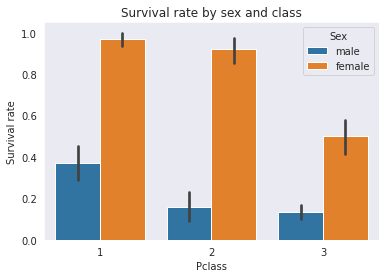

In [22]:
plt.title('Survival rate by sex and class')
g = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_data).set_ylabel('Survival rate')

### Age

이 열에는 많은 결 측값이 포함되어 있지만 훈련 데이터에서 평균 연령이 30 세 미만임을 알 수 있습니다.  
다음은 일반적으로 생존자와 사망자에 대한 연령 분포의 플롯입니다.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


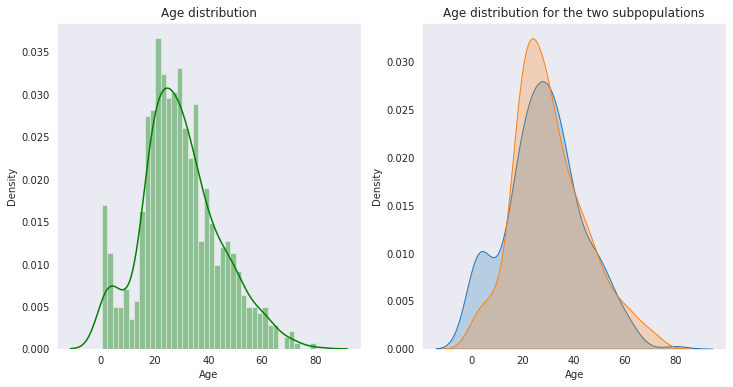

In [23]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
axarr[0].set_title('Age distribution')
f = sns.distplot(train_data['Age'], color='g', bins=40, ax=axarr[0])
axarr[1].set_title('Age distribution for the two subpopulations')
g = sns.kdeplot(train_data['Age'].loc[train_data['Survived'] == 1], 
                shade= True, ax=axarr[1], label='Survived').set_xlabel('Age')
g = sns.kdeplot(train_data['Age'].loc[train_data['Survived'] == 0], 
                shade=True, ax=axarr[1], label='Not Survived')

첫 번째 모습에서, 사이의 관계 Age와 Survived이 나타납니다 매우 명확하지 : 우리는 살아 사람들을 위해 젊은 승객에 해당하는 피크가 있다는 것을 확실히 알 수 있지만, 그 외에도 나머지는 매우 유익하지 않습니다.  
우리도 고려해 보면이 기능을 더 잘 이해할 수 Sex있습니다. 이제 많은 수의 남성 생존자가 12 년 미만을 보냈고 여성 그룹에는 특별한 속성이 없다는 것이 더 분명해졌습니다.

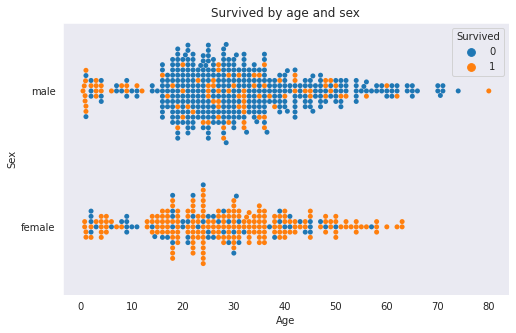

In [24]:
plt.figure(figsize=(8,5))
g = sns.swarmplot(y='Sex', x='Age', hue='Survived', data=train_data).set_title('Survived by age and sex')

살펴볼 또 다른 흥미로운 점은 Age, Pclass및 간의 관계 Survived입니다.  
우리는 Pclass매우 명확한 수평 패턴이 없기 때문에 그 영향이 중요하다고 생각합니다.  
또한 1 등석에는 아이들이 많지 않다는 것을 알 수 있습니다.

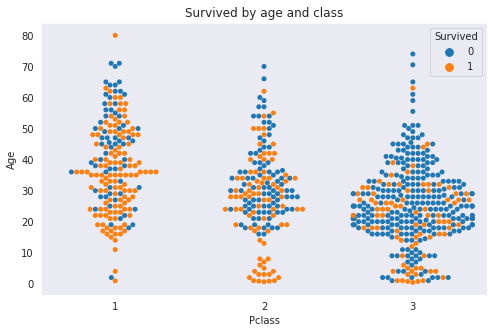

In [25]:
plt.figure(figsize=(8,5))
h = sns.swarmplot(x='Pclass', y='Age', hue='Survived', data=train_data).set_title('Survived by age and class')

이 모든 플롯 후에 나는 Age모델에서 의 중요성에 대해 확신하지 못합니다 . 나는 그것을 사용하지 않을 생각이지만 나중에 보게 될 것이라고 생각합니다.

### Fare

설명에서 Fare분포가 양으로 치우친 것을 볼 수 있습니다. 데이터의 75 %는 31 미만이고 최대는 512입니다.  
이 기능을 더 잘 이해하기 위해 여기서 가장 간단한 아이디어는 사 분위수를 사용하여 요금 범위를 만드는 것입니다.  
처음 보면 운임이 높을수록 생존 가능성이 높아진다는 것을 알 수 있습니다.

In [26]:
train_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


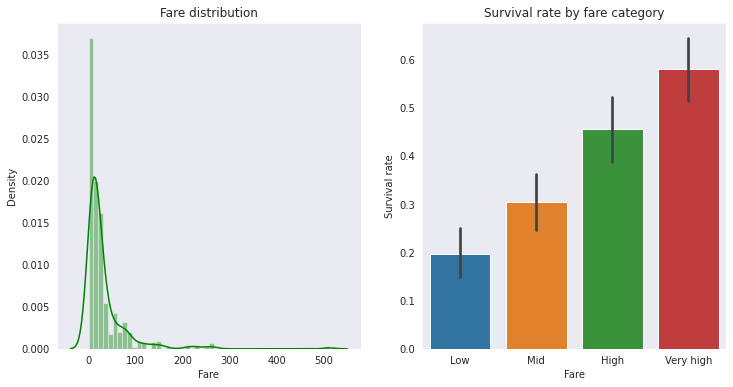

In [27]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
f = sns.distplot(train_data.Fare, color='g', ax=axarr[0]).set_title('Fare distribution')
fare_ranges = pd.qcut(train_data.Fare, 4, labels = ['Low', 'Mid', 'High', 'Very high'])
axarr[1].set_title('Survival rate by fare category')
g = sns.barplot(x=fare_ranges, y=train_data.Survived, ax=axarr[1]).set_ylabel('Survival rate')

그러나 모델링에 관해서는 이러한 운임 범주가 상당히 부족하여 전혀 도움이되지 않았습니다.  
아래의 더 자세한 플롯을 살펴보면 예를 들어 요금이 200에서 300 사이 인 모든 남성이 사망 한 것을 볼 수 있습니다.  
이런 이유로 Fare너무 많은 정보를 잃지 않도록 기능을 그대로 두었습니다 . 트리의 더 깊은 수준에서 더 차별적 인 관계가 열리고 좋은 그룹 탐지기가 될 수 있습니다.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 53.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


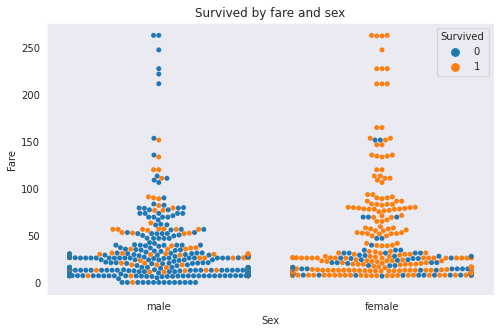

In [28]:
plt.figure(figsize=(8,5))
# 이 플롯에서 운임이 500 초과인 이상 값 3개를 제외했습니다.
a = sns.swarmplot(x='Sex', y='Fare', hue='Survived', data=train_data.loc[train_data.Fare<500]).set_title('Survived by fare and sex')

[여기](https://www.kaggle.com/erikbruin/titanic-2nd-degree-families-and-majority-voting) 에서 Erik의 커널을 본 후이 기능을 충분히 분석하지 않았 음을 상기 시켰습니다.  
설명을 인쇄 할 때의 최소값 Fare이 0이고 조금 이상하다는 사실도 알아 차렸어야합니다 .  
이 정보가 정확합니까? 이 승객이 누구인지 봅시다.

In [29]:
train_data.loc[train_data.Fare==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


그들 중 일부는 1 등석 또는 2 등석 승객이기 때문에 내 모델을 혼동시킬 수있는 제로 요금을 제거하기로 결정했습니다.  
이 함수의 도움으로에 대해 0 값을 만날 때마다 null 값을 설정합니다 Fare.  
그것들은 나중에 모델을 훈련 할 때 전가 될 것입니다.

In [30]:
def remove_zero_fares(row):
    if row.Fare == 0:
        row.Fare = np.NaN
    return row
# Apply the function
train_data = train_data.apply(remove_zero_fares, axis=1)
test_data = test_data.apply(remove_zero_fares, axis=1)
# Check if it did the job
print('Number of zero-Fares: {:d}'.format(train_data.loc[train_data.Fare==0].shape[0]))

Number of zero-Fares: 0


### Embarked

Embarked승객이 어디에서 탑승했는지 알려줍니다.  
세 가지 가능한 값이 있습니다 : Southampton, Cherbourg 및 Queenstown.  
교육 데이터에서 70 % 이상의 사람들이 Southampton에서 탑승했으며 Cherbourg에서 20 % 미만, 나머지는 Queenstown에서 탑승했습니다.  
탑승 지점으로 생존자를 세어 보면 Cherbourg에서 출발 한 사람들이 사망 한 사람들보다 더 많은 사람들이 살아 남았다는 것을 알 수 있습니다.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


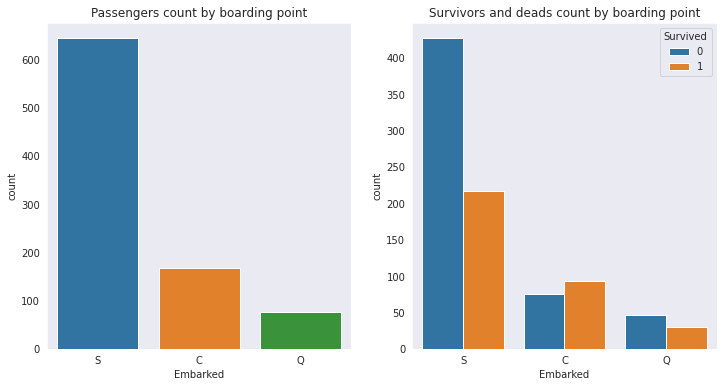

In [31]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
sns.countplot(train_data['Embarked'], ax=axarr[0]).set_title('Passengers count by boarding point')
p = sns.countplot(x = 'Embarked', hue = 'Survived', data = train_data, 
                  ax=axarr[1]).set_title('Survivors and deads count by boarding point')

승객의 탑승 지점이 생존 기회를 바꿀 수있을 것이라고 예상하지 않기 때문에 아마도 퀸스 타운과 사우 샘프 턴이 아닌 Cherbourg에서 온 승객의 1 등석 및 2 등석 승객 비율이 더 높기 때문일 것입니다.  
이를 확인하기 위해 다른 착수 지점에 대한 클래스 분포를 확인합니다.

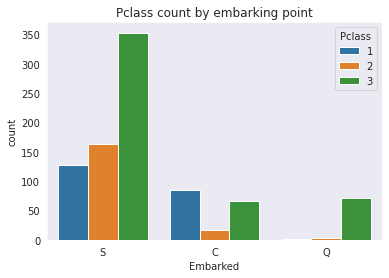

In [32]:
g = sns.countplot(data=train_data, x='Embarked', hue='Pclass').set_title('Pclass count by embarking point')

그 주장은 정확하고 왜 그 생존율이 그렇게 높은지 정당화합니다.  
이 기능은 트리의 더 깊은 수준에서 그룹을 감지하는 데 유용 할 수 있으며 이것이 제가 그것을 유지하는 유일한 이유입니다.

### Name

Name열은 우리가 성씨을 사용하여 가족 그룹을 식별 할 수 예를 들어 같은 유용한 정보가 포함되어 있습니다.  
그러나이 노트북에서는 승객의 직함 만 추출하여 열차 및 테스트 데이터 모두에 대한 새로운 기능을 생성했습니다.

In [33]:
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [34]:
train_data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Mme               1
Lady              1
Capt              1
the Countess      1
Don               1
Jonkheer          1
Ms                1
Sir               1
Name: Title, dtype: int64

In [35]:
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

타이틀의 분포를 살펴보면 정말 저주파 타이틀을 더 큰 그룹으로 옮기는 것이 편리 할 수 ​​있습니다.  
이를 분석 한 후 모든 희귀 여성 타이틀을 미스로, 모든 희귀 남성 타이틀을 Mr.

In [36]:
# 희귀 여성 타이틀 대체
train_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
test_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
# Substitute rare male titles
train_data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
test_data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

다음은 최종 결과입니다. 대부분의 경우 생존율이 평균 생존율보다 상당히 높거나 낮은 것으로 나타나기 때문에이 새로운 기능에 대해 상대적으로 높은 기대를 가지고 있습니다.

In [37]:
train_data.groupby('Title').Survived.mean()

Title
Dr        0.428571
Master    0.575000
Miss      0.707447
Mr        0.160000
Mrs       0.792000
Rev       0.000000
Name: Survived, dtype: float64

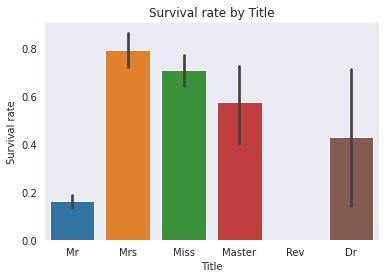

In [38]:
plt.title('Survival rate by Title')
g = sns.barplot(x='Title', y='Survived', data=train_data).set_ylabel('Survival rate')

### Cabin and Ticket

이 Cabin기능은 결 측값이 많기 때문에 다소 문제가 있습니다.  
나는 그것이 우리 모델에 너무 많은 도움이 될 것이라고 기대하지 않으므로 그것을 분석조차하지 않습니다.  
다른 한편으로 올바르게 설계된 Ticket컬럼은 가족 그룹을 찾는 가장 좋은 방법이지만이 노트북에 대해 선택한 접근 방식은 아닙니다 (다른 노트북에서 시도해 볼 것입니다).  
잠재력을 완전히 알고 삭제하는 것이 아쉽기 때문에 두 개의 새로운 열을 만들기로 결정했습니다. 하나는 티켓 처음 두 글자이고 다른 하나는 티켓 길이입니다.

In [39]:
# 처음 두 글자 추출
train_data['Ticket_lett'] = train_data.Ticket.apply(lambda x: x[:2])
test_data['Ticket_lett'] = test_data.Ticket.apply(lambda x: x[:2])
# 티켓 길이 계산
train_data['Ticket_len'] = train_data.Ticket.apply(lambda x: len(x))
test_data['Ticket_len'] = test_data.Ticket.apply(lambda x: len(x))

이것은 우리 모델에 약간 도움이 될 것이므로 여기에서 괜찮다고 생각합니다.

### SibSp

SibSp타이타닉 호에 탑승 한 사람의 형제 자매 또는 배우자의 수입니다.  
90 % 이상의 사람들이 혼자 여행하거나 형제 자매 또는 배우자와 함께 여행 한 것으로 나타났습니다.  
서로 다른 범주 간의 생존율은 다소 혼란 스럽지만 혼자 여행하거나 형제가 2 명 이상인 사람들의 생존 가능성이 낮다는 것을 알 수 있습니다.  
또한, 5 ~ 8 명의 형제 자매가있는 대가족 중 누구도 살아남을 수 없었 음을 알 수 있습니다.  

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


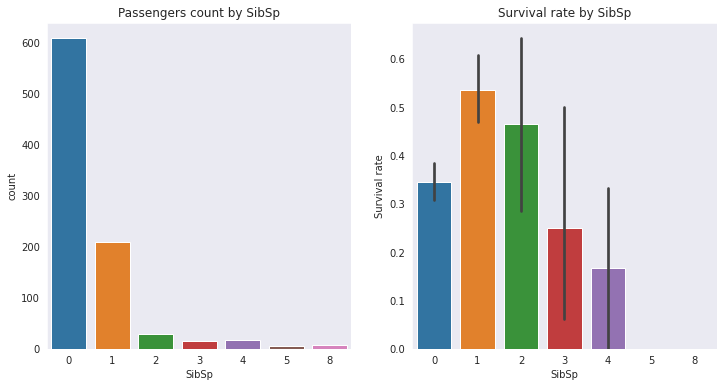

In [40]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(train_data['SibSp'], ax=axarr[0]).set_title('Passengers count by SibSp')
axarr[1].set_title('Survival rate by SibSp')
b = sns.barplot(x='SibSp', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

### Parch

받는 유사 SibSp열이 기능은 부모 또는 각 승객이 함께 여행 한 아이의 수를 포함합니다.  
여기에서 우리는 같은 결론을 내립니다. SibSp작은 가족이 더 큰 가족과 혼자 여행하는 승객보다 생존 할 기회가 더 많다는 것을 다시 한 번 볼 수 있습니다.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


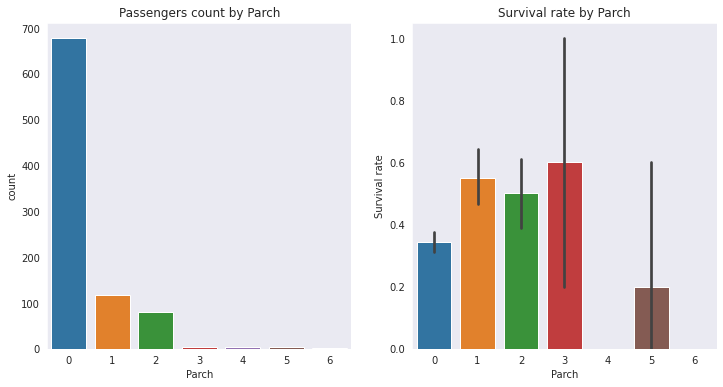

In [41]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(train_data['Parch'], ax=axarr[0]).set_title('Passengers count by Parch')
axarr[1].set_title('Survival rate by Parch')
b = sns.barplot(x='Parch', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

### Family type

약해 보이는 두 개의 예측 변수가 있기 때문에 우리가 할 수있는 한 가지는 이들을 결합하여 더 강한 예측 변수를 얻는 것입니다. 및
의 경우 두 변수를 결합하여 , 및 1 (누가 승객 자신) 의 합인 가족 크기 특성을 얻을 수 있습니다.SibSpParchSibSpParch

In [42]:
# 새로운 Fam_size 컬럼 생성
train_data['Fam_size'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Fam_size'] = test_data['SibSp'] + test_data['Parch'] + 1

가족 규모별로 생존율을 도표화하면 혼자있는 사람들이 최대 4 개 구성 요소의 가족보다 생존 확률이 낮았고, 대가족의 경우 생존율이 떨어지고 궁극적으로 매우 큰 가족의 경우 0이되는 것이 분명합니다.

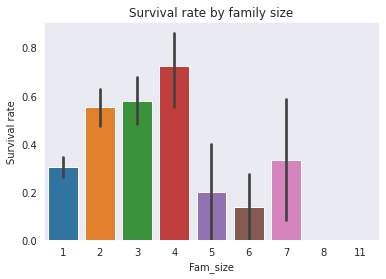

In [43]:
plt.title('Survival rate by family size')
g = sns.barplot(x='Fam_size', y='Survived', data=train_data).set_ylabel('Survival rate')

이전 트렌드를 더 요약하기 위해 마지막 기능으로 가족 규모에 대해 4 개의 그룹을 만들었습니다.

In [44]:
# 4 개 그룹 생성
train_data['Fam_type'] = pd.cut(train_data.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])
test_data['Fam_type'] = pd.cut(test_data.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])

최종 결과는 다음과 같습니다. 좋은 패턴을 발견 한 것 같습니다.

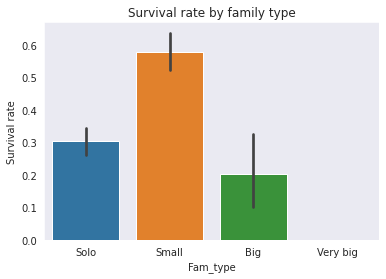

In [45]:
plt.title('Survival rate by family type')
g = sns.barplot(x=train_data.Fam_type, y=train_data.Survived).set_ylabel('Survival rate')

이러한 모든 고려 사항이 끝나면 마침내 모든 것을 간단하고 매우 효율적인 모델에 통합 할 때입니다.

## Modeling

사용할 기능을 선택하고 대상을 격리하는 것으로 시작합니다.  
말씀 드렸듯이 저는 고려하지 않을 것이며 Cabin, Age청년 인 관련 정보가 마스터 제목에 암호화되어 있으므로 결국 제외 했습니다.  
나는 또한 칼럼을 Sex고려할 때 유용 하지 않기 때문에 사용하지 않았습니다 Title. 성인 남성과 어린 아이들은 같은 성별을 가지고 있지만 이전에 본 것과 정말 다른 범주이므로 알고리즘을 혼동하고 싶지 않습니다.  
열을 추출하지 않으면 매우 중요하므로 모델 Title을 입력 Sex하는 것을 잊지 마십시오 !

In [46]:
y = train_data['Survived']
features = ['Pclass', 'Fare', 'Title', 'Embarked', 'Fam_type', 'Ticket_len', 'Ticket_lett']
X = train_data[features]
X.head()

,Pclass,Fare,Title,Embarked,Fam_type,Ticket_len,Ticket_lett
0,3,7.2500,Mr,S,Small,9,A/
1,1,71.2833,Mrs,C,Small,8,PC
2,3,7.9250,Miss,S,Solo,16,ST
3,1,53.1000,Mrs,S,Small,6,11
4,3,8.0500,Mr,S,Solo,6,37


EDA에서 학습 및 테스트 데이터 모두에 누락 된 값이 있고 처리 할 여러 범주 형 변수가 있다는 것을 기억하기 때문에 파이프 라인을 사용하여 모든 작업을 단순화하기로 결정했습니다.

In [47]:
numerical_cols = ['Fare']
categorical_cols = ['Pclass', 'Title', 'Embarked', 'Fam_type', 'Ticket_len', 'Ticket_lett']

# 수치 데이터 전처리
numerical_transformer = SimpleImputer(strategy='median')

# 범주 형 데이터 전처리
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 숫자 및 범주 데이터에 대한 번들 전처리
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 번들 전처리 및 모델링 코드
titanic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=0, n_estimators=500, max_depth=5))
])

# 훈련 데이터 전처리, 모델 적합
titanic_pipeline.fit(X,y)

print('Cross validation score: {:.3f}'.format(cross_val_score(titanic_pipeline, X, y, cv=10).mean()))

Cross validation score: 0.826


이제 테스트 데이터에서 predict 메서드를 호출하기 만하면 예측을 수행 할 준비가되었습니다.

In [48]:
X_test = test_data[features]
X_test.head()

,Pclass,Fare,Title,Embarked,Fam_type,Ticket_len,Ticket_lett
0,3,7.8292,Mr,Q,Solo,6,33
1,3,7.0000,Mrs,S,Small,6,36
2,2,9.6875,Mr,Q,Solo,6,24
3,3,8.6625,Mr,S,Solo,6,31
4,3,12.2875,Mrs,S,Small,7,31


In [49]:
# 테스트 데이터 전처리, 예측 얻기
predictions = titanic_pipeline.predict(X_test)

지금해야 할 일은 제출 파일로 변환하는 것입니다!

In [51]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
files.download("my_submission.csv") # 구글 코랩 다운로드 추가 https://stackoverflow.com/questions/49394737/exporting-data-from-google-colab-to-local-machine
print('Your submission was successfully saved!')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Your submission was successfully saved!


## Conclusion

이것은 저의 첫 Kaggle 대회였으며 한 번에 한 단계 씩 순위표를 오르는 것은 정말 멋진 여정이었습니다.  
아래에서 2020 년 9 월 Titanic LB 점수의 히스토그램을 확인할 수 있습니다. 현재이 노트북은 상위 4 %에 속합니다.  이것은 매우 좋은 점수이지만 영리한 그룹화 접근 방식과 모델 앙상블 링으로 분류기를 개선 할 수 있습니다.  
당신은이 작업을 수행하는 방법에 관심이 있다면, 여기 당신이 도달 0.82775가 (검사 할 수 있음을 내 다른 노트북 찾을 수 이 지금은 최고 점수의 몇 가지 아이디어를 가지고뿐만 아니라 아웃).  
지금은이 노트북이 유용했거나 마음에 들었다면 알려주세요. 정말 감사하겠습니다!  
이 대회에 행운을 빕니다. 다음 대회에서 만나요.